In [2]:
!pip install import-ipynb

In [3]:
import pandas as pd
import numpy as np

importing Jupyter notebook from Data_prep1.ipynb
<class 'pandas.core.frame.DataFrame'>
Index: 17474 entries, 0 to 17475
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              17474 non-null  object 
 1   image                 17474 non-null  object 
 2   story                 17474 non-null  object 
 3   raised_amount($)      17474 non-null  float32
 4   requested_amount($)   17474 non-null  float32
 5   date_of_application   17474 non-null  object 
 6   days_of_fund_raising  17474 non-null  float32
dtypes: float32(3), object(4)
memory usage: 887.4+ KB
7151
3180


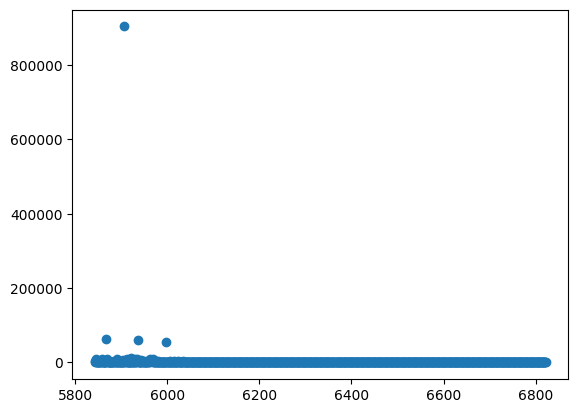

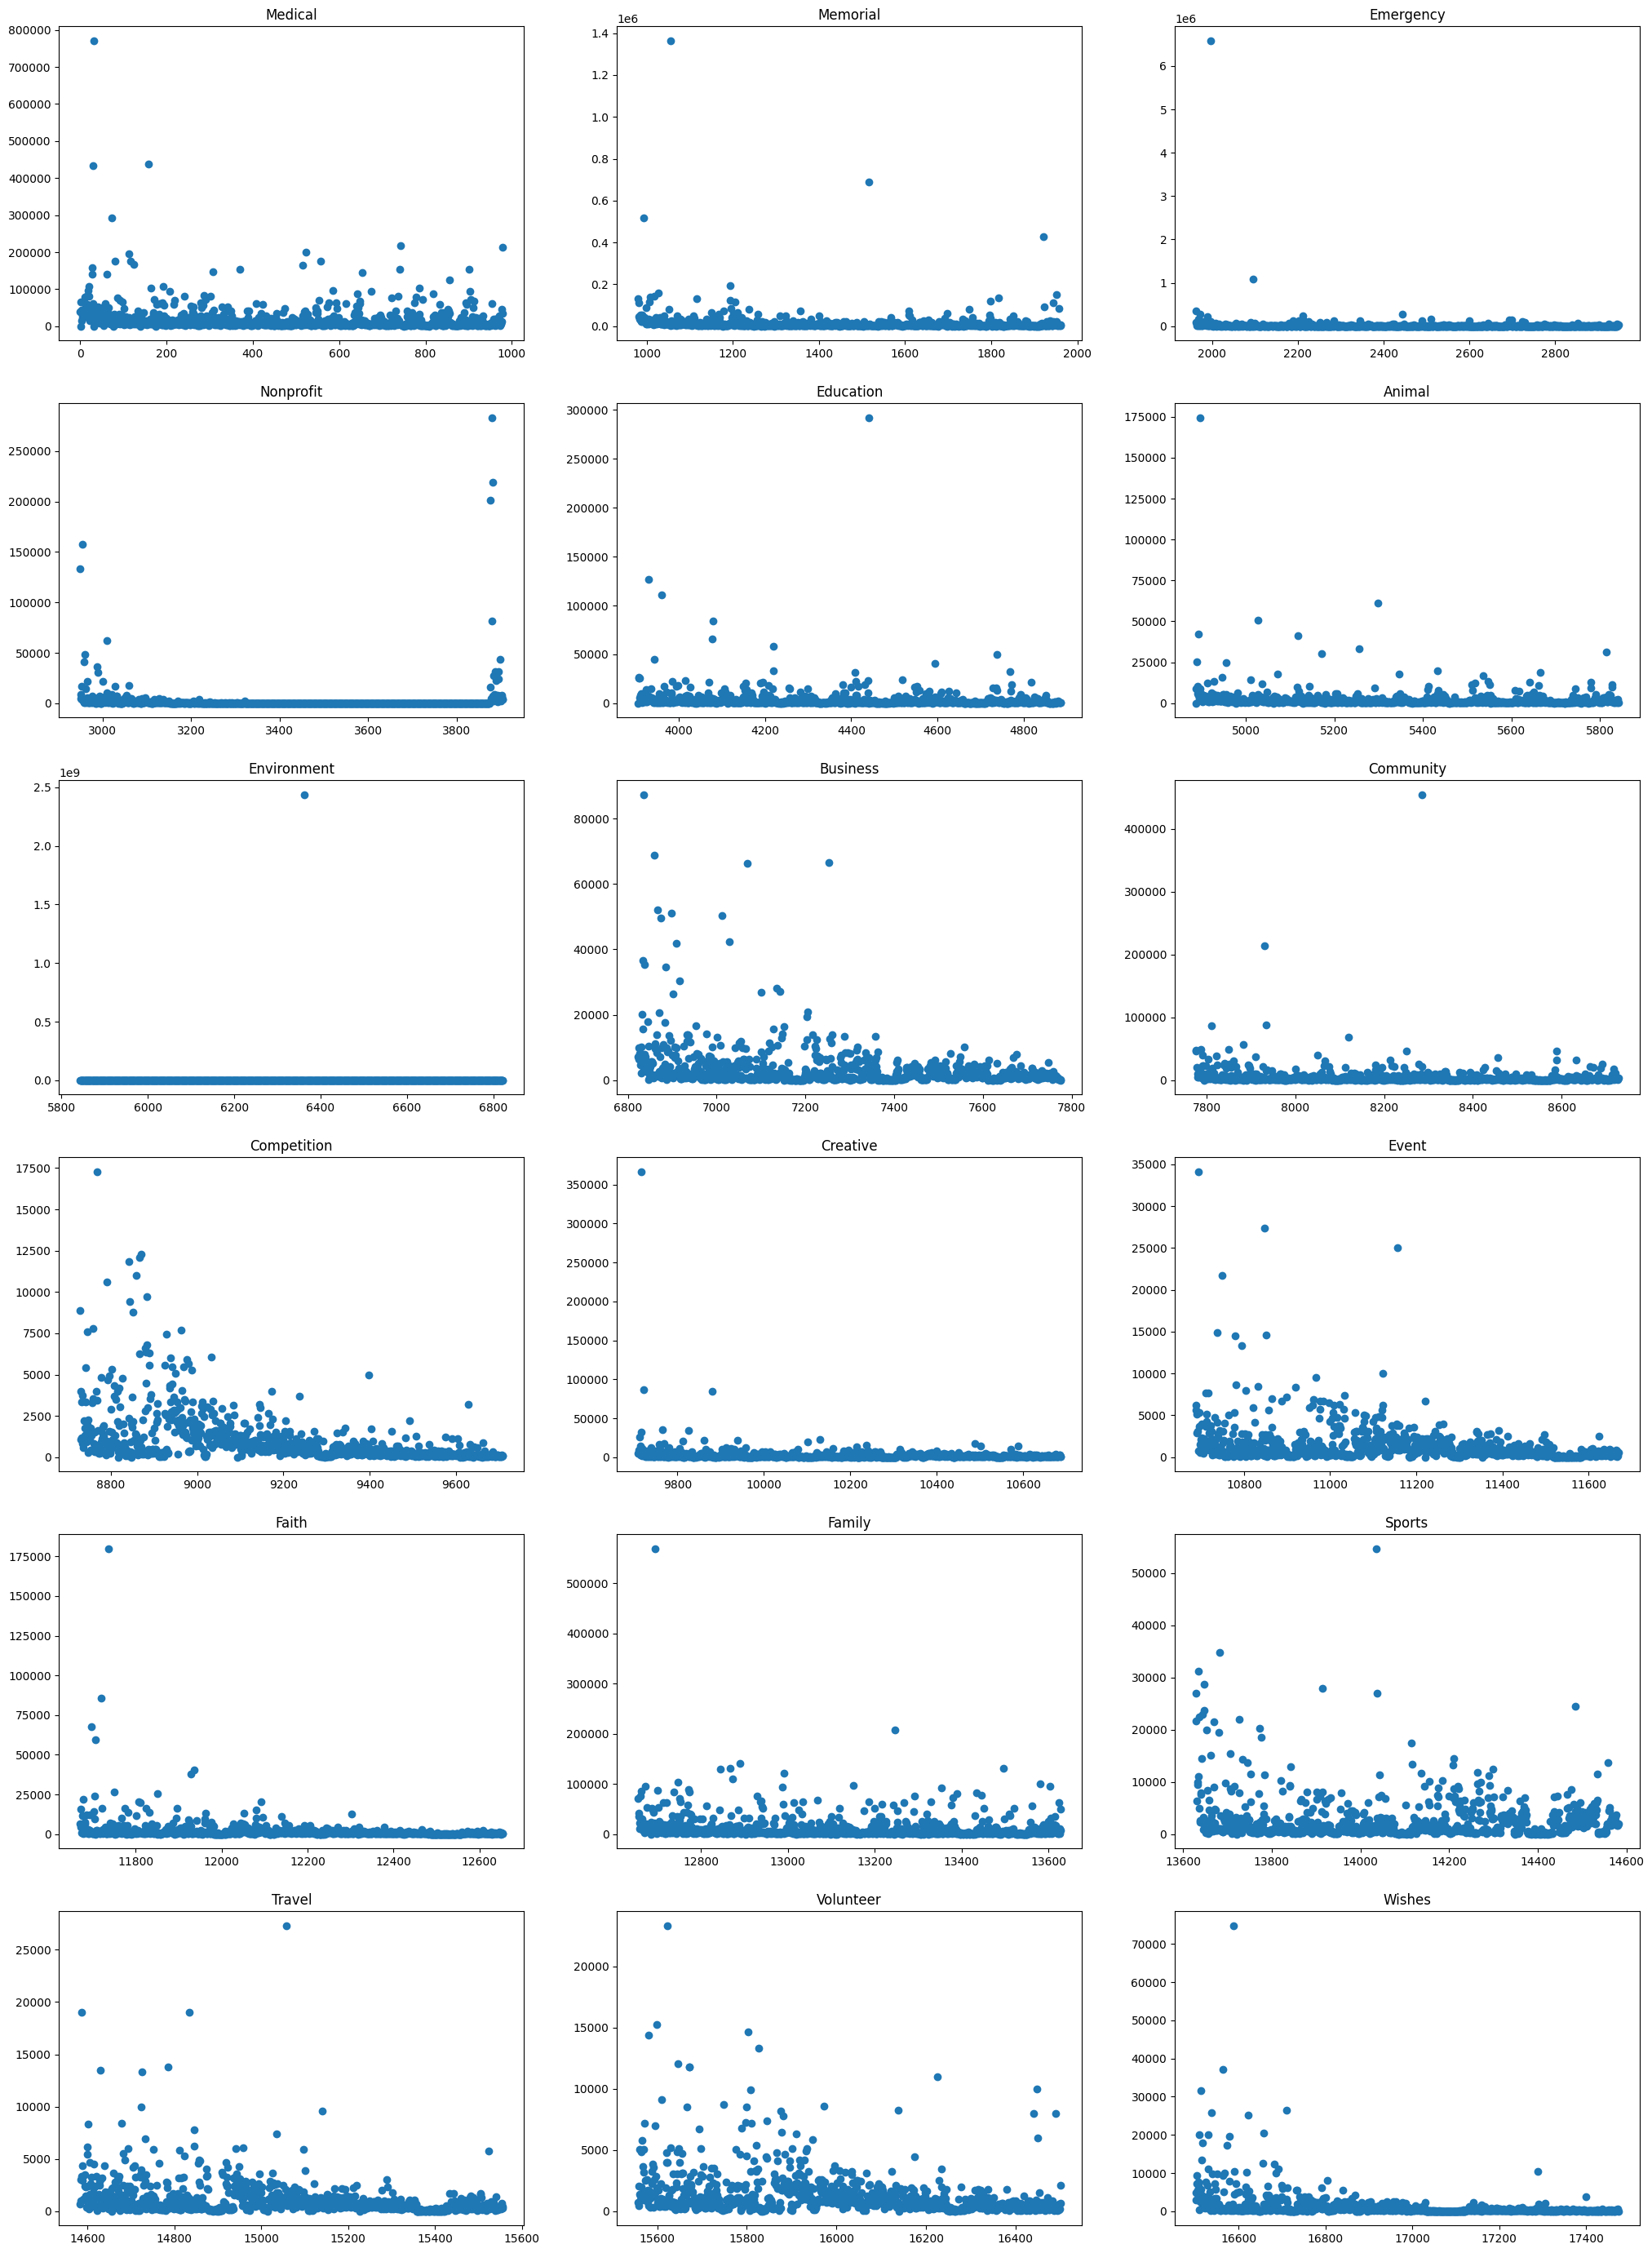

18
['Medical' 'Memorial' 'Emergency' 'Nonprofit' 'Education' 'Animal'
 'Environment' 'Business' 'Community' 'Competition' 'Creative' 'Event'
 'Faith' 'Family' 'Sports' 'Travel' 'Volunteer' 'Wishes']
<class 'pandas.core.frame.DataFrame'>
Index: 17474 entries, 0 to 17475
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   category              17474 non-null  object 
 1   context               17474 non-null  object 
 2   image                 17474 non-null  object 
 3   requested_amount($)   17474 non-null  float32
 4   days_of_fund_raising  17474 non-null  float32
 5   raised_amount($)      17439 non-null  float32
dtypes: float32(3), object(3)
memory usage: 1.2+ MB


<string>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<string>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but whe

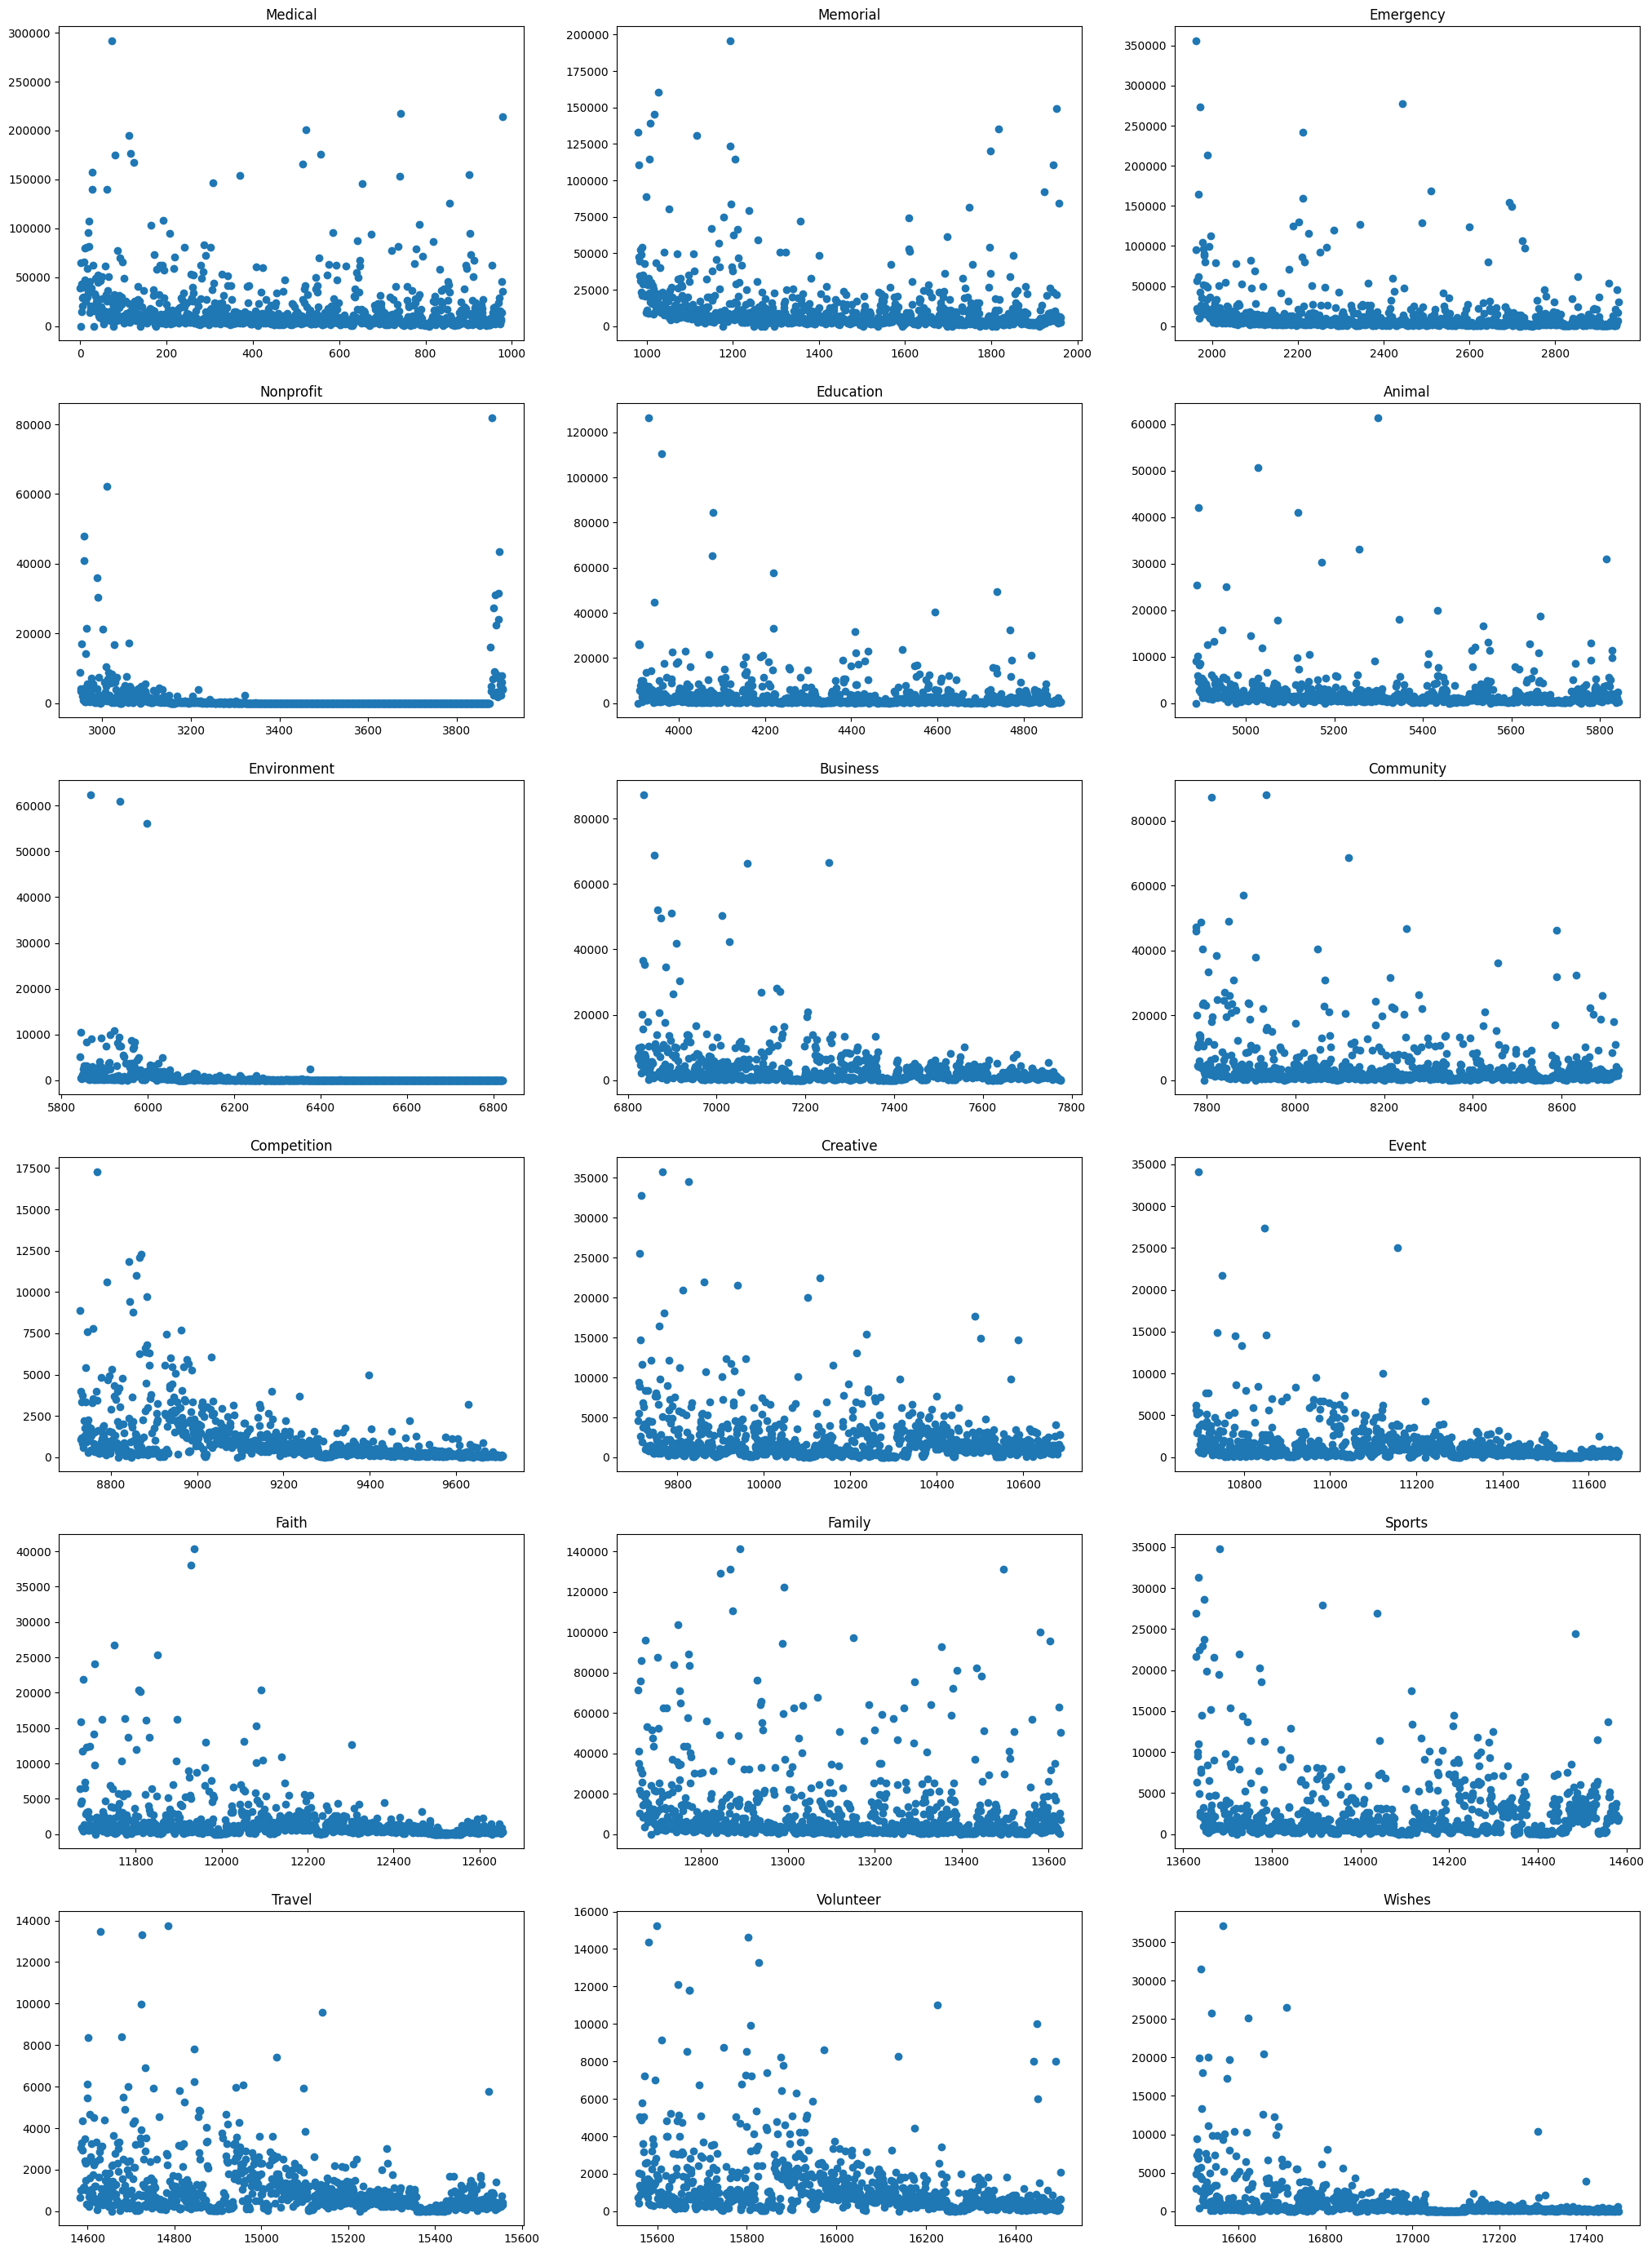

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Animal to Wishes
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   individual_sum  18 non-null     float32
dtypes: float32(1)
memory usage: 216.0+ bytes
[('Emergency', 0.2766588192805508), ('Community', 0.17525930711189452), ('Medical', 0.16968163090773872), ('Environment', 0.14675815678839252), ('Education', 0.1465122277393057), ('Business', 0.10996501587290852), ('Creative', 0.09907374740799565), ('Faith', 0.09503537576791449), ('Event', 0.08066932174315583), ('Volunteer', 0.07566870724483893), ('Nonprofit', 0.07344956007767017), ('Family', 0.06138787161729334), ('Wishes', 0.059821314592963665), ('Travel', 0.059731243135904305), ('Sports', 0.05670410880718252), ('Animal', 0.048298610374808704), ('Memorial', 0.04512486118838424), ('Competition', 0.04141126525789174)]


In [4]:
import import_ipynb
import Data_prep1

In [5]:
df=Data_prep1.df_context

In [6]:
df=pd.DataFrame(df)

In [7]:
df

,context
0,On August the son of and Holly away during the...
1,per dha Po me me jam i se jam Jam mi dot me ha...
2,Riley Shaw year old and born and raised in was...
3,My uncle been in and out of the emergency room...
4,is beautiful and vivacious year old girl When ...
...,...
17471,As single and student I balance the of motherh...
17472,Help us fill birthday wish for this amazing of...
17473,My name is My daughter and I are gratefully wh...
17474,Dear I am writing to you with sense of urgency...


In [8]:
from gensim.utils import simple_preprocess
from gensim.models import Word2Vec

In [9]:
df['tokenized_context']= df['context'].apply(lambda text:simple_preprocess(text))

In [10]:
df

,context,tokenized_context
0,On August the son of and Holly away during the...,"[on, august, the, son, of, and, holly, away, d..."
1,per dha Po me me jam i se jam Jam mi dot me ha...,"[per, dha, po, me, me, jam, se, jam, jam, mi, ..."
2,Riley Shaw year old and born and raised in was...,"[riley, shaw, year, old, and, born, and, raise..."
3,My uncle been in and out of the emergency room...,"[my, uncle, been, in, and, out, of, the, emerg..."
4,is beautiful and vivacious year old girl When ...,"[is, beautiful, and, vivacious, year, old, gir..."
...,...,...
17471,As single and student I balance the of motherh...,"[as, single, and, student, balance, the, of, m..."
17472,Help us fill birthday wish for this amazing of...,"[help, us, fill, birthday, wish, for, this, am..."
17473,My name is My daughter and I are gratefully wh...,"[my, name, is, my, daughter, and, are, gratefu..."
17474,Dear I am writing to you with sense of urgency...,"[dear, am, writing, to, you, with, sense, of, ..."


In [11]:
# Train Word2Vec model
model = Word2Vec(sentences=df['tokenized_context'], vector_size=150, window=5, min_count=1, workers=4)

In [12]:
def document_to_vector(tokens, model):
    # Get the vectors for each token that exists in the model's vocabulary
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    
    # If the document has words in the vocabulary, return the mean of the vectors, else return a zero vector
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(model.vector_size)

# Apply the function to each row in the DataFrame
df['vector'] = df['tokenized_context'].apply(lambda x: document_to_vector(x, model))

In [21]:
df.columns

Index(['context', 'tokenized_context', 'vector'], dtype='object')

Data Final

In [22]:
df_final = Data_prep1.df[['context', 'image', 'requested_amount($)',
       'days_of_fund_raising','num_category','raised_amount($)']]

In [23]:
df_final['vector'] = df['vector']

In [24]:
df_final.drop(columns=('context')).columns

Index(['image', 'requested_amount($)', 'days_of_fund_raising', 'num_category',
       'raised_amount($)', 'vector'],
      dtype='object')

In [25]:
df_final = df_final[['image', 'vector', 'requested_amount($)', 'days_of_fund_raising', 'num_category',
       'raised_amount($)']]

In [26]:
df_final

,image,vector,requested_amount($),days_of_fund_raising,num_category,raised_amount($)
0,https://images.gofundme.com/HCcZpJ2vF8Oupas9rb...,"[-0.3401895, 0.20407312, -0.11414551, 0.377606...",5000.0,2.0,0.224903,38859.0
1,https://images.gofundme.com/-q_0SMy9Mmmvt--9-E...,"[-0.38178718, -0.09134245, -0.17337006, 0.0215...",22775.0,3.0,0.224903,0.0
2,https://images.gofundme.com/9I5n9sZwDdOMhrC4SG...,"[-0.0040681614, 0.1461612, -0.15618062, 0.5738...",100000.0,2.0,0.224903,64775.0
3,https://images.gofundme.com/ZxpdNzhwgMeI41rm1e...,"[-0.1999116, -0.079704344, -0.20132074, 0.2768...",27000.0,21.0,0.224903,14727.0
4,https://images.gofundme.com/-iM30RBCFDg8nFloo3...,"[-0.15659878, 0.07777101, -0.32270473, 0.43581...",50000.0,3.0,0.224903,43104.0
...,...,...,...,...,...,...
17471,https://images.gofundme.com/U7KzmndtOMMldn6iJR...,"[-0.7148102, 0.3211339, -0.16870776, 0.0281312...",10000.0,48.0,0.014516,200.0
17472,https://images.gofundme.com/7Q_w33NO4ciKwje7k_...,"[-0.28416198, 0.05892469, -0.13687652, 0.30491...",3000.0,49.0,0.014516,245.0
17473,https://images.gofundme.com/AlK7wLVZ6WPU7gKULn...,"[-0.57083166, 0.13084272, -0.031910207, 0.0111...",1600.0,49.0,0.014516,570.0
17474,https://images.gofundme.com/5wbdKeFq2wiL0b5pA4...,"[-0.3552499, 0.30489364, -0.013626815, 0.08658...",5000.0,47.0,0.014516,70.0


Image Data

In [28]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import requests
from PIL import Image
from io import BytesIO

In [27]:
# Load the VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add a global average pooling layer and a dense layer to get a 128-dimensional vector
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=x)

In [29]:
def load_and_preprocess_image(img_url):
    try:
        response = requests.get(img_url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))

        # Convert RGBA to RGB if necessary
        if img.mode == 'RGBA':
            img = img.convert('RGB')

        img = img.resize((224, 224))
        img_array = np.array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_input(img_array)
        return img_array

    except requests.exceptions.RequestException as e:
        print(f"Error loading image {img_url}: {e}")
        return None
    except Exception as e:
        print(f"Error processing image {img_url}: {e}")
        return None

In [30]:
# Function to extract features using VGG16 and convert them into context vectors
def extract_features(image_url):
    img = load_and_preprocess_image(image_url)
    if img is not None:
        features = model.predict(img)
        context_vector = features.flatten()
        if context_vector.size != 128:
            return np.resize(context_vector, 128)
        return context_vector
    else:
        return np.zeros(128)  # If image loading fails, return a zero vector of appropriate size


In [33]:
new_df = pd.DataFrame()  # Create an empty DataFrame to store the results

In [40]:
chunk_size=3000
for start in range(10000, len(df), chunk_size):
    end = start + chunk_size
    chunk = df_final.iloc[start:end].copy()
    print(start)
    chunk['img_context_vector'] = chunk['image'].apply(extract_features)
    print('done')
    new_df = pd.concat([new_df, chunk], ignore_index=True)

10000
Error loading image https://images.gofundme.com/qK7G79vvU6bbqWMzmfepdKmc_68=/720x405/https://d2g8igdw686xgo.cloudfront.net/80141315_1715805869720784_r.png: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 475ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step

ValueError: as_list() is not defined on an unknown TensorShape.

In [41]:
new_df.shape # at error 1

(12000, 7)

In [45]:
new_df.drop(columns='image').to_csv('model2_final_Data.csv')